In [1]:
import pickle
import numpy as np
import scanpy as sc
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from sklearn import preprocessing
import os 
import warnings
import seaborn as sns


#### define necessary parameters

In [89]:
warnings.filterwarnings('ignore')
cwd = os.getcwd()
input_dir = cwd+"/inputs/"
output_dir = cwd+"/outputs/"
figures_dir = cwd+"/figures/"

In [93]:
figures_dir = cwd+"/figures/png/"

In [94]:
figures_dir

'/project/scATAC_analysis/scATAcat_notebooks_for_paper/analyses/FACS_BM_scATAC/marker_based_annotation/figures/png/'

In [90]:
cmap_gray_blue=sns.blend_palette(["lightgray", "#6A99D0"], as_cmap=True)
cmap_viridis_r = sns.color_palette("viridis_r", as_cmap=True)
def plot_gene_activity_of_UMAP(adata, gene_name, activity_matrix, out_path, cmap_):
    '''
    adata: AnnData object of scATAC-seq experiment
    gene_name: name of the gene whose acivity is plotted
    activity_matrix: gene score matrix (pandas)
        rows: gene names (str)
        columns: cells. needs to overlpa with the adata.obs.index
    out_path: dir and filename to save the plot
    '''
    if gene_name not in activity_matrix.index:
        print("this gene is not included in the gene activity matrix")
        return
    else:
        # scale the gene 0-1
        gene_df = pd.DataFrame(activity_matrix.loc[gene_name,:])
        x = gene_df.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        gene_df_scaled = pd.DataFrame(x_scaled)
        gene_df_scaled.index = gene_df.index
        adata.obs[gene_name] = gene_df_scaled.loc[adata.obs.index,]
        with plt.rc_context():  # Use this to set figure params like size and dpi
            sc.pl.umap(
            adata,
            color=gene_name,
            cmap=cmap_,
            #cmap=sns.blend_palette(["lightgray", "#6A99D0"], as_cmap=True),
            add_outline=False, frameon=False, title ="", size=25,show=False,
            legend_fontsize='xx-small’')
            plt.savefig(out_path, bbox_inches="tight",dpi=400 )
        

In [ ]:
del plot_gene_activity_of_UMAP

In [87]:
cmap_gray_blue=sns.blend_palette(["lightgray", "#6A99D0"], as_cmap=True)
cmap_viridis_r = sns.color_palette("viridis_r", as_cmap=True)
def plot_gene_activity_of_UMAP(adata, gene_name, activity_matrix, out_path, cmap_):
    '''
    adata: AnnData object of scATAC-seq experiment
    gene_name: name of the gene whose acivity is plotted
    activity_matrix: gene score matrix (pandas)
        rows: gene names (str)
        columns: cells. needs to overlpa with the adata.obs.index
    out_path: dir and filename to save the plot
    '''
    if gene_name not in activity_matrix.index:
        print("this gene is not included in the gene activity matrix")
        return
    else:
        # scale the gene 0-1
        gene_df = pd.DataFrame(activity_matrix.loc[gene_name,:])
        x = gene_df.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        gene_df_scaled = pd.DataFrame(x_scaled)
        gene_df_scaled.index = gene_df.index
        adata.obs[gene_name] = gene_df_scaled.loc[adata.obs.index,]
        with plt.rc_context():  # Use this to set figure params like size and dpi
            sc.pl.umap(
            adata,
            color=gene_name,
            cmap=cmap_,
            #cmap=sns.blend_palette(["lightgray", "#6A99D0"], as_cmap=True),
            add_outline=False, frameon=False, title ="", size=25,show=False,
            legend_loc=None)
            plt.savefig(out_path, bbox_inches="tight",dpi=400 )
        

#### import scanpy object

In [52]:
sc_commonDiffFeatures_adata= pickle.load(open('/project/scATAC_analysis/scATAcat_notebooks_for_paper/analyses/FACS_BM_scATAC/scATAcat/03_apply_scATAcat/application_with_external_bulk/outputs/sc_commonDiffFeatures_adata.pkl','rb'))


# look at the marker gene activities of the marker genes 

source: https://www.sciencedirect.com/science/article/pii/S0092867419305598#mmc2

https://ars.els-cdn.com/content/image/1-s2.0-S0092867419305598-mmc2.pdf




Page 4 represents the expression of celltype marker genes in HCA bone marrow cells. AVP: marker of hematopoietic stem cells (HSC). LMO4: basophil progenitor (Bas). PF4: megakaryocyte progenitor (MkP). BLVRB: erythroid progenitor (Er). MME: common lymphoid progenitor (CLp). DERL3: plasmacytoid dendritic cell (pDC). CLEC9A: conventional dendritic cell 1 (cDC1). CDC1: convensional dendritic cell 2 (cDC2). MPO: granulocyte macrophage progenitor (GMP). AZU1: neutrophil progenitor (Neu). CD14: CD14+ monocyte (CD14 Mono). FCGR3A: CD16+ monocyte (CD16 Mono). VREB3: immature B cell (Immature B). MS4A1: mature B cell (Mature B). CD79A: immature / mature B cell (Immature/Mature B). IGKC: plasma cell (Plasma). PF4: megakaryocytes (Mk). XCL1: CD56+ natural killer cells (NK Bright). CD8A: CD8+ T cells (CD8 T). CD4: CD4+ T cells (CD4 T). SH2D1A: pre-T cell (pre-T). Cells are projected into two dimensions using UMAP, and colored based on normalized RNA counts for each gene (range 0-99th expression percentile for each gene).
...

In [53]:

pbmc_atac_activity_matrix = pd.read_csv("/project/scATAC_analysis/scATAcat_notebooks_for_paper/analyses/FACS_BM_scATAC/marker_based_annotation/inputs/gene_activities.csv", index_col=0)
pbmc_atac_activity_matrix.head()


,CLP_0,CLP_1,CMP_0,CMP_1,CMP_2,CMP_3,CMP_4,CMP_5,CMP_6,CMP_7,...,LMPP_86,LMPP_87,LMPP_88,LMPP_89,LMPP_90,LMPP_91,LMPP_92,LMPP_93,LMPP_94,LMPP_95
PLCXD1,0,0,0,0,0,0,0,0,0,0,...,1,0,2,0,1,0,0,0,2,0
GTPBP6,0,0,0,0,0,3,1,0,1,0,...,3,0,1,1,0,1,0,0,2,2
PPP2R3B,0,0,1,0,1,0,0,0,3,0,...,0,1,0,3,0,3,0,0,1,1
SHOX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CRLF2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,1,0,0


In [54]:
# make a cmap such that itis still visible:
# lightest color is gray and with increasing expression we have darkening colors of blue
blues_cmap = matplotlib.cm.Blues(np.linspace(0,1,10))
# matplotlib.colors.to_rgba("lightgray", alpha=None) --> gray
#new_blues_cmap = sns.blend_palette(blues_cmap[3:10], as_cmap=True)
new_blues_cmap = sns.blend_palette(np.insert(blues_cmap[3:10], 0, matplotlib.colors.to_rgba("lightgray", alpha=None), axis=0), as_cmap=True)


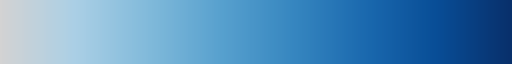

In [115]:
new_blues_cmap

In [76]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MME", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/MME_gene_act_CLP_marker.pdf",
                           cmap_= new_blues_cmap)


In [88]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MME", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/MME_gene_act_CLP_marker.png",
                           cmap_= new_blues_cmap)


In [77]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MPO", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/MPO_gene_act_CLP_marker.pdf",
                           cmap_= new_blues_cmap)

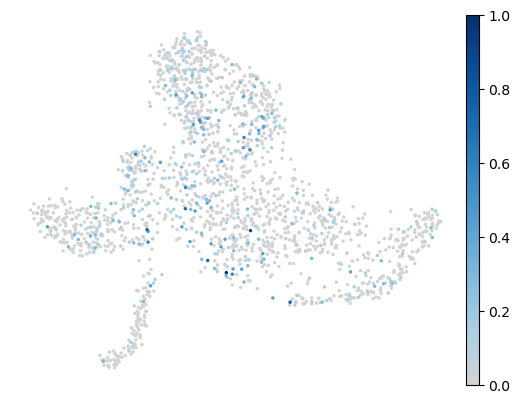

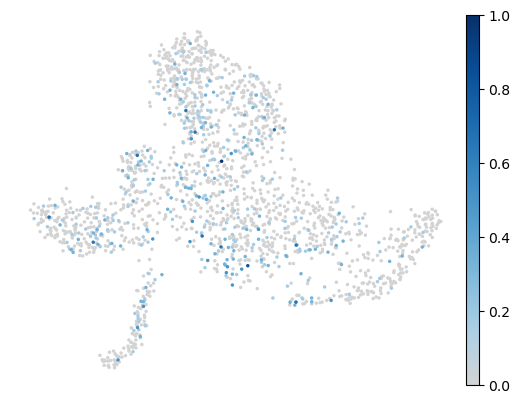

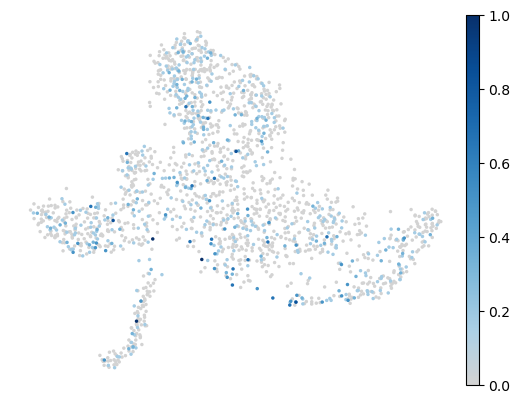

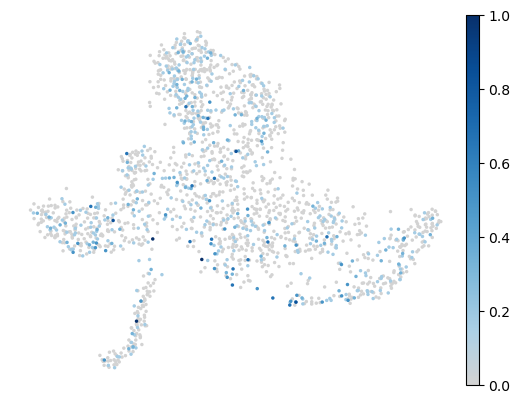

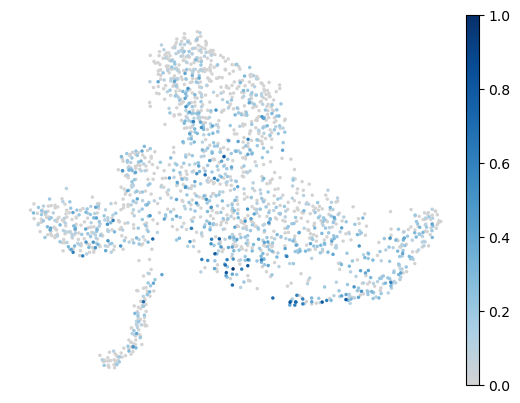

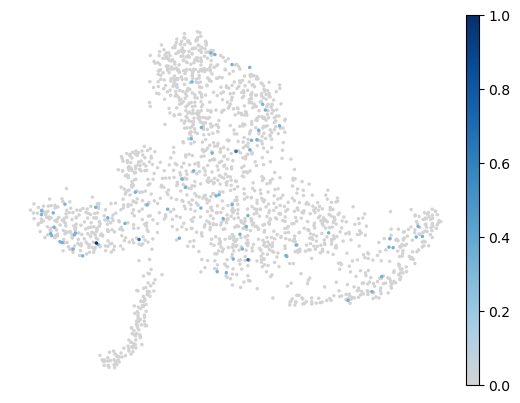

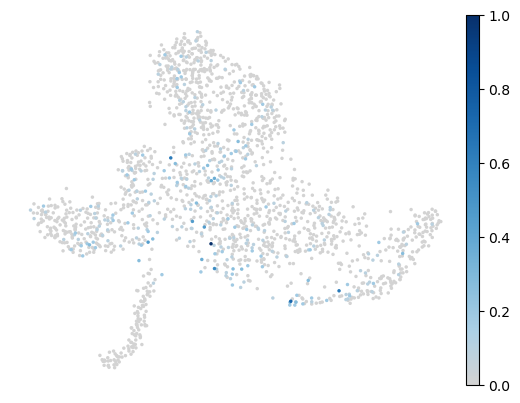

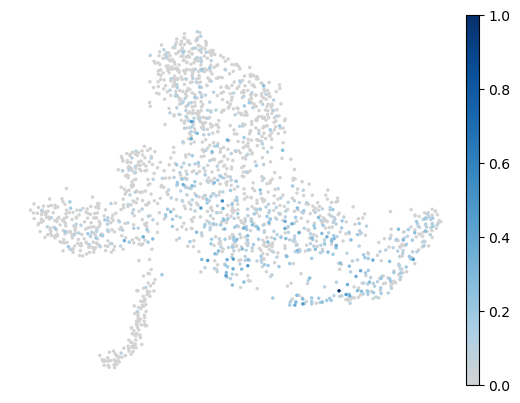

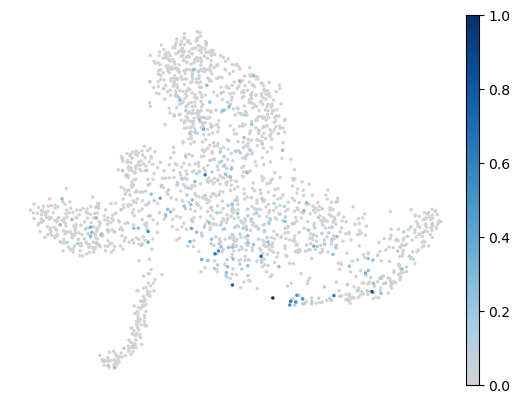

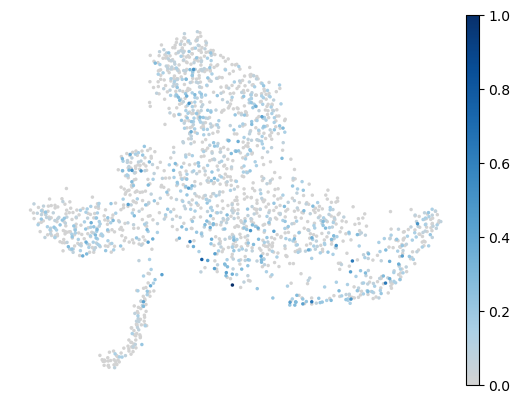

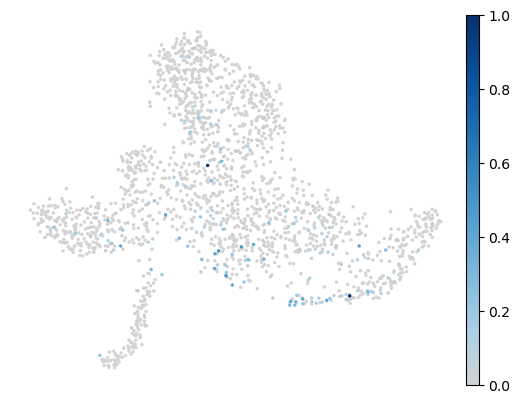

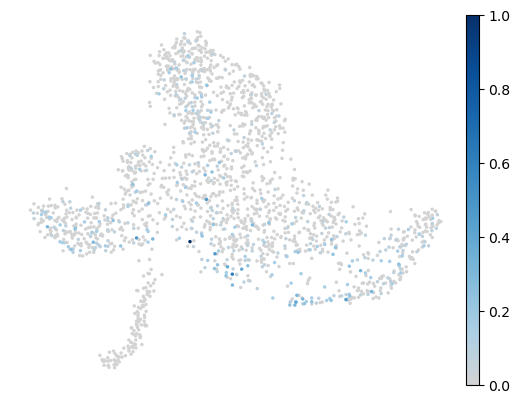

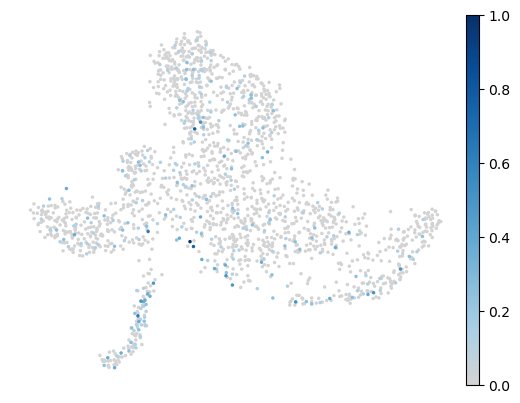

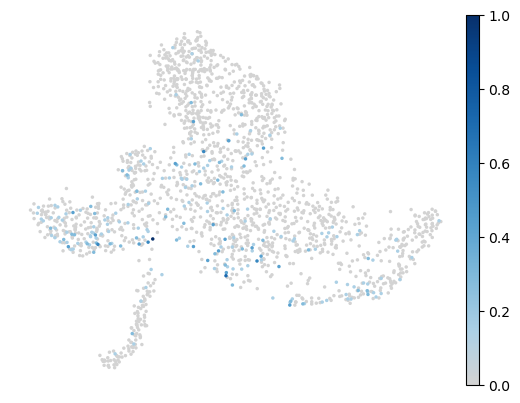

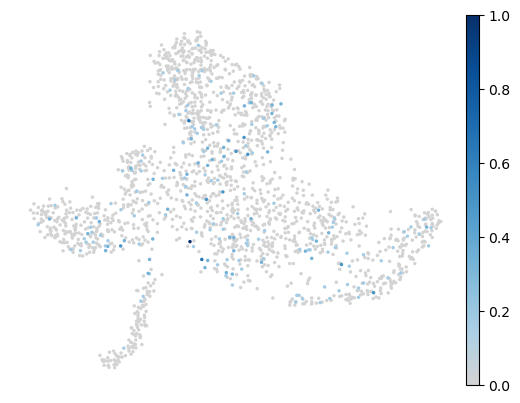

In [78]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="AVP", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/AVP_gene_act_HSC_marker.pdf",
                           cmap_= new_blues_cmap)

In [79]:
plt.close()

In [80]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="HOPX", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/HOPX_gene_act_HSC_marker.pdf",
                           cmap_= new_blues_cmap)

In [81]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="ZNF467", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/ZNF467_gene_act_HSC_MPP_marker.pdf",
                           cmap_= new_blues_cmap)

In [82]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD34", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CD34_gene_act_HSC_marker.pdf",
                           cmap_=new_blues_cmap)

In [83]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD34", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CD34_gene_act_HSC_marker.pdf",
                           cmap_=new_blues_cmap)

In [84]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD90", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CD90_gene_act_HSC_marker.pdf",
                           cmap_=new_blues_cmap)#sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))


this gene is not included in the gene activity matrix


In [85]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="DUSP1", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/DUSP1_gene_act_HSC_marker.pdf",
                           cmap_= new_blues_cmap
                           )


In [86]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="LYZ", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/LYZ_gene_act_GMP_marker.pdf",
                           cmap_=new_blues_cmap)


KeyboardInterrupt



In [ ]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CSF3R", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CSF3R_gene_act_CMP_marker.pdf",
                           cmap_= new_blues_cmap)

In [ ]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="HDC", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/HDC_gene_act_CMP_marker.pdf",
                           cmap_= new_blues_cmap)

In [ ]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="NAT8L", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/NAT8L_gene_act_CMP_marker.pdf",
                           cmap_= new_blues_cmap)

In [ ]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="NRIP1", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/NRIP1_gene_act_HSC_marker.pdf",
                           cmap_= new_blues_cmap)

In [ ]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MMEL1", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/MMEL1_gene_act_CMP_marker.pdf",
                           cmap_= new_blues_cmap)

In [ ]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="TGM2", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/TGM2_gene_act_CMP_marker.pdf",
                           cmap_= new_blues_cmap)

# export png


In [97]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MME", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/MME_gene_act_CLP_marker.png",
                           cmap_= new_blues_cmap)


In [98]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MPO", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/MPO_gene_act_CLP_marker.png",
                           cmap_= new_blues_cmap)

In [99]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="AVP", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/AVP_gene_act_HSC_marker.png",
                           cmap_= new_blues_cmap)

In [100]:
plt.close()

In [101]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="HOPX", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/HOPX_gene_act_HSC_marker.png",
                           cmap_= new_blues_cmap)

In [102]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="ZNF467", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/ZNF467_gene_act_HSC_MPP_marker.png",
                           cmap_= new_blues_cmap)

In [103]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD34", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CD34_gene_act_HSC_marker.png",
                           cmap_=new_blues_cmap)

In [104]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD34", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CD34_gene_act_HSC_marker.png",
                           cmap_=new_blues_cmap)

In [105]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CD90", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CD90_gene_act_HSC_marker.png",
                           cmap_=new_blues_cmap)#sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))


this gene is not included in the gene activity matrix


In [106]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="DUSP1", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/DUSP1_gene_act_HSC_marker.png",
                           cmap_= new_blues_cmap
                           )


In [107]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="LYZ", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/LYZ_gene_act_GMP_marker.png",
                           cmap_=new_blues_cmap)

In [108]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="CSF3R", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/CSF3R_gene_act_CMP_marker.png",
                           cmap_= new_blues_cmap)

In [109]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="HDC", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/HDC_gene_act_CMP_marker.png",
                           cmap_= new_blues_cmap)

In [110]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="NAT8L", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/NAT8L_gene_act_CMP_marker.png",
                           cmap_= new_blues_cmap)

In [111]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="NRIP1", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/NRIP1_gene_act_HSC_marker.png",
                           cmap_= new_blues_cmap)

In [112]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="MMEL1", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/MMEL1_gene_act_CMP_marker.png",
                           cmap_= new_blues_cmap)

In [113]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="TGM2", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/TGM2_gene_act_CMP_marker.png",
                           cmap_= new_blues_cmap)

In [114]:
plot_gene_activity_of_UMAP(adata=sc_commonDiffFeatures_adata, 
                           gene_name="ZNF70", 
                           activity_matrix=pbmc_atac_activity_matrix,
                           out_path=figures_dir+"/ZNF70_gene_act_CMP_marker.png",
                           cmap_= new_blues_cmap)

In [117]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='groundTruth_CMP', palette=['#6A99D0','lightgray'], show=False,size=25 , add_outline=False, frameon=False,title="", legend_loc=None)
    plt.savefig(figures_dir+"/groundTruth_CMP.png", bbox_inches="tight", dpi=400)


In [122]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='groundTruth_CMP', palette=['#6A99D0','lightgray'], show=False,size=25 , add_outline=False, frameon=False,title="")
    plt.savefig(figures_dir+"/groundTruth_CMP_with_legend.png", bbox_inches="tight", dpi=400)


In [119]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='groundTruth_HSC', palette=['#6A99D0','lightgray'], show=False,size=25 , add_outline=False, frameon=False,title="", legend_loc=None)
    plt.savefig(figures_dir+"/groundTruth_HSC.png", bbox_inches="tight", dpi=400)


In [120]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='groundTruth_CLP', palette=['#6A99D0','lightgray'], show=False,size=25 , add_outline=False, frameon=False,title="", legend_loc=None)
    plt.savefig(figures_dir+"/groundTruth_CLP.png", bbox_inches="tight", dpi=400)


In [121]:
with plt.rc_context(): 
    sc.pl.umap(sc_commonDiffFeatures_adata, color='groundTruth_MEP', palette=['#6A99D0','lightgray'], show=False,size=25 , add_outline=False, frameon=False,title="", legend_loc=None)
    plt.savefig(figures_dir+"/groundTruth_MEP.png", bbox_inches="tight", dpi=400)
